<img src="https://www.dropbox.com/s/hbboab06opouy05/big_tech.png?raw=1" align="left">

&nbsp;

# Python for Accounting - Practical 3

&nbsp;

Welcome to the Python for Accounting Practicals. This series of practical sessions consists of three separate sessions, that will teach you to work with stock data and financial documents in Python. 

Python is the most popular programming language for data analysis/data science worldwide by far and is also the most popular programming language in fintech. Python is extremely versatile and although it might not be the language of choice for every purpose it certainly can be used for almost anything. Another great feature about Python is that it is very easy to learn and that you can find blogs, tutorials, forum posts or video tutorials on almost any topic. 

### What you will learn in this session

- Combine data from different companies into a single dataframe 
- Calculate new columns/variables  
- Reshape a dataframe
- Create and customize a bar plot with seaborn 

### More information on how the session is run

<b>How to work together</b>: 
        <ul>
            <li>Plesase turn on your microphone and webcam.</li>
            <li>One shares the screen and the others requests remote control. </li>
            <li>Take turns on who types for each exercise.</li>
        </ul>
<b>What to do when getting stuck</b>:
    <ol>
        <li>Search online:</li>
        <ol>
            <li>The answer box on the top of Google's results page</li>
            <li><a href="https://www.stackoverflow.com">stackoverflow.com</a> (task-specific solutions)</li>
            <li><a href="https://www.w3schools.com">w3schools.com</a> (basic python questions)</li>
            <li><a href="https://www.realpython.com">realpython.com</a> (topic-based tutorials)</li>
        </ol>
        <li>Ask the trainer if you struggle to find a solution.</li>
    </ol>

&nbsp;


# Comparing big tech companies

## Importing balance sheets and income statements from yahoo finance

We want to download the balance sheets and income statements from the big tech companies, that is, Facebook, Apple, Amazon, Google and Microsoft from the yahoo finance website. Unfortunately, the pandas_datareader library does not provide a function to do that, which is why we had to write the code ourselves. You can find the function yf_financials() in the yfscrap module, which is located in the same folder as this jupyter notebook on your computer.

### Importing a balance sheet

In the example below we are using the `yf_financials()` function to import the balance sheet from Amazon. See below for explanations on the code.

In [3]:
# import libraries
from yfscrap import yf_financials
import pandas as pd
import matplotlib.pyplot as plt

# change pandas options to display all columns and change display format
pd.set_option('display.max.columns', None)

# download Amazon balance sheet
balance_sheet_amzn = yf_financials('AMZN', type_='bs')

display(balance_sheet_amzn)

,Comp,Total Assets,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Total Capitalization,Common Stock Equity,Capital Lease Obligations,Net Tangible Assets,Working Capital,Invested Capital,Tangible Book Value,Total Debt,Net Debt,Share Issued,Ordinary Shares Number,Treasury Shares Number
Date,,,,,,,,,,,,,,,,
12/31/2019,AMZN,225248000.0,163188000.0,62060000.0,85474000.0,62060000.0,39791000.0,43257000.0,8522000.0,85474000.0,43257000.0,63205000.0,4221000.0,521000.0,498000.0,23000.0
12/31/2018,AMZN,162648000.0,119099000.0,43549000.0,67044000.0,43549000.0,16292000.0,24891000.0,6710000.0,67044000.0,24891000.0,39787000.0,NaN,514000.0,491000.0,23000.0
12/31/2017,AMZN,131310000.0,103601000.0,27709000.0,52452000.0,27709000.0,13183000.0,10988000.0,2314000.0,52452000.0,10988000.0,37926000.0,NaN,507000.0,484000.0,23000.0


#### Line 2-4: Importing libraries
<br>

```python
from yfscrap import yf_financials
import pandas as pd
import matplotlib.pyplot as plt
```
We import the function **yf_financials()** from the local module **yfscrap**, which is located in the same folder as this jupyter notebook. We also import pandas and matplotlib.

#### Line 7: Changing the pandas display options
<br>

```python
pd.set_option('display.max.columns', None)
```
To always display all columns from a dataframe we set the max columns option to None. The income statement has many columns...

#### Line 10: Downloading the balance sheet
<br>

```python
balance_sheet_amzn = yf_financials('AMZN', type_='bs')
```
The `yf_financials()` function takes two arguments - the ticker of the stock and the type of document to download (balance sheet or income statemnent). We pass `'bs'` as the argument for `type_` to download the balance sheet.

&nbsp;

&nbsp;

### Task 1: Importing the income statement for Amazon

1. Use the help() function on the yf_financials function to find out which value to pass to the type_ argument in order to download an income statement.
2. Download the income statement from Amazon
3. Display the income statement
4. Print the column types of the income statement to check that all columns with numerical values have a numeric type

### solution output

In [39]:
# don't run this cell

Help on function yf_financials in module yfscrap:

yf_financials(tkr, type_)
    Scrape and parse the balance sheet or income statement from finance.yahoo.com and
    return as a dataframe with dates as index and financial variables in columns.
    
    Arugments: 
    - tkr : stock ticker
    - type_ : "bs" (balance sheet) or "is" (income statement)
    
    Returns: 
    - financial table as pandas DataFrame



,Comp,Total Revenue,Cost of Revenue,Gross Profit,Operating Expense,Operating Income,Net Non Operating Interest Income Expense,Other Income Expense,Pretax Income,Tax Provision,Earnings from Equity Interest Net of Tax,Net Income Common Stockholders,Diluted NI Available to Com Stockholders,Basic EPS,Diluted EPS,Basic Average Shares,Diluted Average Shares,Total Operating Income as Reported,Total Expenses,Net Income from Continuing & Discontinued Operation,Normalized Income,Interest Income,Interest Expense,Net Interest Income,EBIT,EBITDA,Reconciled Cost of Revenue,Reconciled Depreciation,Net Income from Continuing Operation Net Minority Interest,Total Unusual Items Excluding Goodwill,Total Unusual Items,Normalized EBITDA,Tax Rate for Calcs,Tax Effect of Unusual Items
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ttm,AMZN,321782000.0,239893000.0,81889000.0,65020000.0,16869000.0,-885000.0,305000.0,16289000.0,3009000.0,-100000.0,13180000.0,13180000.0,0.0235,0.0230,494000.0,504000.0,16869000.0,304913000.0,13180000.0,13180000.0,771000.0,1656000.0,-885000.0,17945000.0,40788000.0,239893000.0,22843000.0,13180000.0,203000.0,203000.0,40788000.0,0.0,0.0
12/31/2019,AMZN,280522000.0,205768000.0,74754000.0,60213000.0,14541000.0,-768000.0,203000.0,13976000.0,2374000.0,-14000.0,11588000.0,11588000.0,0.0207,0.0201,487000.0,500000.0,14541000.0,265981000.0,11588000.0,11588000.0,832000.0,1600000.0,-768000.0,15576000.0,NaN,205768000.0,21789000.0,11588000.0,-183000.0,-183000.0,37365000.0,0.0,0.0
12/31/2018,AMZN,232887000.0,173183000.0,59704000.0,47283000.0,12421000.0,-977000.0,-183000.0,11261000.0,1197000.0,9000.0,10073000.0,10073000.0,0.0063,0.0062,480000.0,493000.0,12421000.0,220466000.0,10073000.0,10073000.0,440000.0,1417000.0,-977000.0,12678000.0,NaN,173183000.0,15341000.0,10073000.0,346000.0,346000.0,28019000.0,0.0,0.0
12/31/2017,AMZN,177866000.0,137183000.0,40683000.0,36577000.0,4106000.0,-646000.0,346000.0,3806000.0,769000.0,-4000.0,3033000.0,3033000.0,NaN,NaN,NaN,NaN,4106000.0,173760000.0,3033000.0,3033000.0,202000.0,848000.0,-646000.0,4654000.0,NaN,137183000.0,11478000.0,3033000.0,NaN,NaN,16132000.0,0.0,0.0


0
Comp                                                           object
Total Revenue                                                 float64
Cost of Revenue                                               float64
Gross Profit                                                  float64
Operating Expense                                             float64
Operating Income                                              float64
Net Non Operating Interest Income Expense                     float64
Other Income Expense                                          float64
Pretax Income                                                 float64
Tax Provision                                                 float64
Earnings from Equity Interest Net of Tax                      float64
Net Income Common Stockholders                                float64
Diluted NI Available to Com Stockholders                      float64
Basic EPS                                                     float64
Diluted EPS       

&nbsp;

## Combining balance sheets and income statements with .append()

Since we want to download balance sheets and income statements from more than one company, it would be ideal if we could combine all balance sheets and all income statements into two respetive dataframes.

We can easily combine them with the `.append()` method. See the example below on how to combine two balance sheets. 

It is important to set the **sort** parameter for the `.append()` method to False! Otherwise the method will reorder the columns in the dataset by name, which would move the Comp column from the first to the third position!

In [40]:
# download balance sheet for Amazon
balance_sheets = yf_financials('AMZN', type_='bs')

# download balance sheet for Microsoft
balance_sheet_msft = yf_financials('MSFT', type_='bs')

# append balance_sheet_msft to balance_sheets
balance_sheets = balance_sheets.append(balance_sheet_msft, sort=False)

display(balance_sheets)

,Comp,Total Assets,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Total Capitalization,Common Stock Equity,Capital Lease Obligations,Net Tangible Assets,Working Capital,Invested Capital,Tangible Book Value,Total Debt,Net Debt,Share Issued,Ordinary Shares Number,Treasury Shares Number
Date,,,,,,,,,,,,,,,,
12/31/2019,AMZN,225248000.0,163188000.0,62060000.0,85474000.0,62060000.0,39791000.0,43257000.0,8522000.0,85474000.0,43257000.0,63205000.0,4221000.0,521000.0,498000.0,23000.0
12/31/2018,AMZN,162648000.0,119099000.0,43549000.0,67044000.0,43549000.0,16292000.0,24891000.0,6710000.0,67044000.0,24891000.0,39787000.0,NaN,514000.0,491000.0,23000.0
12/31/2017,AMZN,131310000.0,103601000.0,27709000.0,52452000.0,27709000.0,13183000.0,10988000.0,2314000.0,52452000.0,10988000.0,37926000.0,NaN,507000.0,484000.0,23000.0
6/30/2020,MSFT,301311000.0,183007000.0,118304000.0,177882000.0,118304000.0,7671000.0,67915000.0,109605000.0,181631000.0,67915000.0,70998000.0,49751000.0,7571000.0,7571000.0,NaN
6/30/2019,MSFT,286556000.0,184226000.0,102330000.0,168992000.0,102330000.0,6188000.0,52554000.0,106132000.0,174508000.0,52554000.0,78366000.0,60822000.0,7643000.0,7643000.0,NaN
6/30/2018,MSFT,258848000.0,176130000.0,82718000.0,154960000.0,82718000.0,5568000.0,38982000.0,111174000.0,158958000.0,38982000.0,81808000.0,64294000.0,7677000.0,7677000.0,NaN
6/30/2017,MSFT,241086000.0,168692000.0,72394000.0,148467000.0,72394000.0,NaN,27166000.0,95324000.0,158588000.0,27166000.0,86194000.0,78531000.0,7708000.0,7708000.0,NaN


&nbsp;

### Task 2: Combine all balance sheets

Fill in the blanks in the code cell below to 
1. Loop through the remaining tickers from the list `tickers` starting with `'AAPL'` (the ticker at list index 1).
2. In each iteration of the for loop download the balance sheet and append it to the dataframe `balance_sheets`
3. Display `balance_sheets`. Check your for statement, if the data for Amazon duplicated.

In [ ]:
tickers = ['AMZN', 'AAPL', 'MSFT', 'GOOG', 'FB']

# download balance sheet for first ticker
balance_sheets = yf_financials(tickers[0], type_='bs')

# loop through remaining tickers
for _ _ _ _  in _ _ _ _ _ :
    # downoad balance sheet for ticker
    balance_sheet =
    # append balance sheet
    balance_sheets = 

# display balance sheets
display()

### Solution output

In [41]:
# don't run this cell

,Comp,Total Assets,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Total Capitalization,Common Stock Equity,Capital Lease Obligations,Net Tangible Assets,Working Capital,Invested Capital,Tangible Book Value,Total Debt,Net Debt,Share Issued,Ordinary Shares Number,Treasury Shares Number
Date,,,,,,,,,,,,,,,,
12/31/2019,AMZN,225248000.0,163188000.0,62060000.0,85474000.0,62060000.0,39791000.0,43257000.0,8522000.0,85474000.0,43257000.0,63205000.0,4221000.0,521000.0,498000.0,23000.0
12/31/2018,AMZN,162648000.0,119099000.0,43549000.0,67044000.0,43549000.0,16292000.0,24891000.0,6710000.0,67044000.0,24891000.0,39787000.0,NaN,514000.0,491000.0,23000.0
12/31/2017,AMZN,131310000.0,103601000.0,27709000.0,52452000.0,27709000.0,13183000.0,10988000.0,2314000.0,52452000.0,10988000.0,37926000.0,NaN,507000.0,484000.0,23000.0
9/30/2020,AAPL,323888000.0,258549000.0,65339000.0,164006000.0,65339000.0,NaN,65339000.0,38321000.0,177775000.0,65339000.0,112436000.0,74420000.0,16976763.0,16976763.0,NaN
9/30/2019,AAPL,338516000.0,248028000.0,90488000.0,182295000.0,90488000.0,NaN,90488000.0,57101000.0,198535000.0,90488000.0,108047000.0,59203000.0,17772944.0,17772944.0,NaN
9/30/2018,AAPL,365725000.0,258578000.0,107147000.0,200882000.0,107147000.0,NaN,107147000.0,14473000.0,221630000.0,107147000.0,114483000.0,88570000.0,19019944.0,19019944.0,NaN
9/30/2017,AAPL,375319000.0,241272000.0,134047000.0,231254000.0,134047000.0,NaN,126032000.0,27831000.0,249727000.0,126032000.0,115680000.0,95391000.0,20504804.0,20504804.0,NaN
6/30/2020,MSFT,301311000.0,183007000.0,118304000.0,177882000.0,118304000.0,7671000.0,67915000.0,109605000.0,181631000.0,67915000.0,70998000.0,49751000.0,7571000.0,7571000.0,NaN
6/30/2019,MSFT,286556000.0,184226000.0,102330000.0,168992000.0,102330000.0,6188000.0,52554000.0,106132000.0,174508000.0,52554000.0,78366000.0,60822000.0,7643000.0,7643000.0,NaN


&nbsp;

### Task 3: Combine all income statements

Copy the code from the above cell and adjust it to download and combine all income statements.

### Solution output

In [5]:
# don't run this cell

,Comp,Total Revenue,Cost of Revenue,Gross Profit,Operating Expense,Operating Income,Net Non Operating Interest Income Expense,Other Income Expense,Pretax Income,Tax Provision,Earnings from Equity Interest Net of Tax,Net Income Common Stockholders,Diluted NI Available to Com Stockholders,Basic EPS,Diluted EPS,Basic Average Shares,Diluted Average Shares,Total Operating Income as Reported,Total Expenses,Net Income from Continuing & Discontinued Operation,Normalized Income,Interest Income,Interest Expense,Net Interest Income,EBIT,EBITDA,Reconciled Cost of Revenue,Reconciled Depreciation,Net Income from Continuing Operation Net Minority Interest,Total Unusual Items Excluding Goodwill,Total Unusual Items,Normalized EBITDA,Tax Rate for Calcs,Tax Effect of Unusual Items,Average Dilution Earnings
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ttm,AMZN,321782000.0,239893000.0,81889000.0,65020000.0,16869000.0,-885000.0,305000.0,16289000.0,3009000.0,-100000.0,13180000.0,13180000.0,0.0235,0.0230,494000.0,504000.0,16869000.0,304913000.0,13180000.0,13180000.0,771000.0,1656000.0,-885000.0,17945000.0,40788000.0,239893000.0,22843000.0,13180000.0,203000.0,203000.0,40788000.0,0.0,0.0,NaN
12/31/2019,AMZN,280522000.0,205768000.0,74754000.0,60213000.0,14541000.0,-768000.0,203000.0,13976000.0,2374000.0,-14000.0,11588000.0,11588000.0,0.0207,0.0201,487000.0,500000.0,14541000.0,265981000.0,11588000.0,11588000.0,832000.0,1600000.0,-768000.0,15576000.0,NaN,205768000.0,21789000.0,11588000.0,-183000.0,-183000.0,37365000.0,0.0,0.0,NaN
12/31/2018,AMZN,232887000.0,173183000.0,59704000.0,47283000.0,12421000.0,-977000.0,-183000.0,11261000.0,1197000.0,9000.0,10073000.0,10073000.0,0.0063,0.0062,480000.0,493000.0,12421000.0,220466000.0,10073000.0,10073000.0,440000.0,1417000.0,-977000.0,12678000.0,NaN,173183000.0,15341000.0,10073000.0,346000.0,346000.0,28019000.0,0.0,0.0,NaN
12/31/2017,AMZN,177866000.0,137183000.0,40683000.0,36577000.0,4106000.0,-646000.0,346000.0,3806000.0,769000.0,-4000.0,3033000.0,3033000.0,NaN,NaN,NaN,NaN,4106000.0,173760000.0,3033000.0,3033000.0,202000.0,848000.0,-646000.0,4654000.0,NaN,137183000.0,11478000.0,3033000.0,NaN,NaN,16132000.0,0.0,0.0,NaN
ttm,AAPL,273857000.0,169277000.0,104580000.0,37442000.0,67138000.0,1052000.0,127000.0,68317000.0,9893000.0,NaN,58424000.0,58424000.0,0.0033,0.0033,17352119.0,17528214.0,67138000.0,206719000.0,58424000.0,58424000.0,4101000.0,3049000.0,1052000.0,71366000.0,82899000.0,169277000.0,11533000.0,58424000.0,NaN,NaN,82899000.0,0.0,0.0,NaN
9/30/2020,AAPL,274515000.0,169559000.0,104956000.0,38668000.0,66288000.0,890000.0,-87000.0,67091000.0,9680000.0,NaN,57411000.0,57411000.0,0.0030,0.0030,18471336.0,18595652.0,66288000.0,208227000.0,57411000.0,57411000.0,3763000.0,2873000.0,890000.0,69964000.0,NaN,169559000.0,11056000.0,57411000.0,NaN,NaN,81020000.0,0.0,0.0,NaN
9/30/2019,AAPL,260174000.0,161782000.0,98392000.0,34462000.0,63930000.0,1385000.0,422000.0,65737000.0,10481000.0,NaN,55256000.0,55256000.0,0.0030,0.0030,19821508.0,20000436.0,63930000.0,196244000.0,55256000.0,55256000.0,4961000.0,3576000.0,1385000.0,69313000.0,NaN,161782000.0,12547000.0,55256000.0,NaN,NaN,81860000.0,0.0,0.0,NaN
9/30/2018,AAPL,265595000.0,163756000.0,101839000.0,30941000.0,70898000.0,2446000.0,-441000.0,72903000.0,13372000.0,NaN,59531000.0,59531000.0,0.0023,0.0023,20868968.0,21006768.0,70898000.0,194697000.0,59531000.0,59531000.0,5686000.0,3240000.0,2446000.0,76143000.0,NaN,163756000.0,10903000.0,59531000.0,NaN,NaN,87046000.0,0.0,0.0,NaN
9/30/2017,AAPL,229234000.0,141048000.0,88186000.0,26842000.0,61344000.0,2878000.0,-133000.0,64089000.0,15738000.0,NaN,48351000.0,48351000.0,NaN,NaN,NaN,NaN,61344000.0,167890000.0,48351000.0,48351000.0,5201000.0,2323000.0,2878000.0,66412000.0,NaN,141048000.0,10157000.0,48351000.0,NaN,NaN,76569000.0,0.0,0.0,NaN


&nbsp;

## Working with balance sheets and income statements

The values in the balance sheets and incoment statements are in Thousands, which is why we have to multiply all values *apart from those in the **Comp** column* by 1000.

<img src="https://www.dropbox.com/s/9rmhgbr2vm05vpb/yahoo_finance01.png?raw=1" width="400px" align="left">

We can select a number of columns by their label with the .loc property. See an example below on how to select a series of columns with .loc

In [6]:
df = pd.DataFrame({'a':[1,2,3,4,5], 
                   'b':[1,2,3,4,5], 
                   'c':[1,2,3,4,5],
                   'd':[1,2,3,4,5]})

df.loc[:, 'b' : 'd']

,b,c,d
0,1,1,1
1,2,2,2
2,3,3,3
3,4,4,4
4,5,5,5


&nbsp;

### Task 4: Multiply numerical values by 1000

Use the .loc property to update all *but* the **Comp** column's values in the balance_sheets and income_statements data frame.

&nbsp;

### Task 5: Calculating gross profit margin and operating margin

1. Create a new column in the income_statements dataset to calculate the Gross Profit Margin: gross profit divided by total revenue x 100
2. Create another new column in the income_statements dataset to cacluate the operating margin: EBIT divided by total revenue x 100

In [25]:
# values for AMZN to compare your output to

,Comp,gross_profit_margin,operating_margin
Date,,,
ttm,AMZN,25.448596,5.576757
12/31/2019,AMZN,26.648177,5.552506
12/31/2018,AMZN,25.636467,5.443842
12/31/2017,AMZN,22.872837,2.616577


&nbsp;

## Plotting with seaborn

In the next step, we will create a bar plot showing the gross profit and operating margin for each company. We will use the seaborn library for this plot. The seaborn library is based on matplotlib. In comparison to matplotlib, it is often a lot easier to create a nice looking plot with seaborn. Matplotlib, however, offers you more options to create highly customized plots.

### Barplot with seaborn

To demonstrate how to create a barplot with seaborn, we will use the titanic dataset to plot how passenger class and sex affect survival rates. Below we first load the titanic dataset with `sns.load_dataset('titanic')`.

The first three columns code for whether a passenger survived (0: no, 1: yes), the passenger class (1, 2, 3) and the sex (male, female).

In [9]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### A simple bar plot

We will now plot the survival rates based on the **survived** column as a function of the passenger class, which is stored in the **pclass** column. We want to plot the passenger class on the x-axis and the Survival rate on the y-axis.

To do so, we use the `catplot()` function to plot the average of the values in the survived column, i.e. the surival rate, for each passenger class. [The `catplot()` function can be used to draw a number of categorical plots:  strip, swarm, box, violin, boxen, point, bar, or count](https://seaborn.pydata.org/tutorial/categorical.html).

We pass as arguments:
1. `x='pclass'`: To plot the categorical variable **pclass** on the x-axis
2. `y='survived'`: To plot the mean of the column **survived** on the y-axis
3. `kind='bar'`: To draw a barplot.
4. `data=titanic`: The dataset to be used.

We assign the created plot object to the variable **g**, so that we can call the plot object to modify it later on.

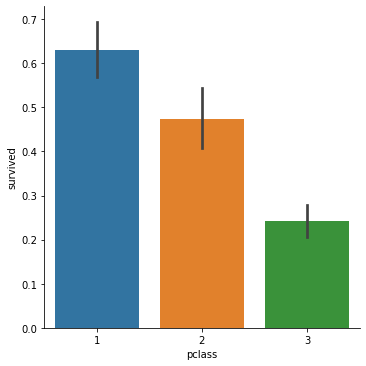

In [10]:
g = sns.catplot(x='pclass', y='survived', kind='bar', data=titanic)

### A grouped bar plot

In the next step, we will plot the survival rate as a function of two variables: passenger class and sex. We still want the passenger class to be plotted at different positions on the x-axis but we will also plot differently coloured bars for female and male passengers within each passenger class.

To plot male and female passengers in different colours, we include `hue='sex'` in the function call.

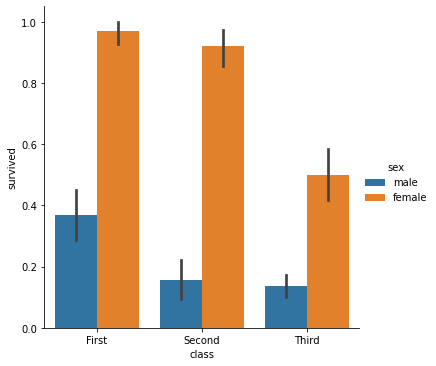

In [11]:
g = sns.catplot(x='class', y='survived', hue='sex', kind='bar', data=titanic)

## Creating a margin plot with seaborn

Before we can plot the data, we have to prepare it so that we can create a grouped barplot.

### Preparing the data

In the first step we will select the data from 2019 by using the .loc property to only select the values from 2019. The companies use slightly different times to release their annual reports, which is why we first set up a **mask** variable to return a list of True and False values for when the date in the index column is either `'12/31/2019'`, `'9/30/2019'` or `'6/30/2019'`. 

To create the **mask** variable, we use the `.isin()` method, which tests whether a value in the index is equal to one of the values in the list `['12/31/2019', '9/30/2019', '6/30/2019']`.

We then apply the **mask** with the .loc property and also select the columns for the company, the gross profit margin and the operating margin with the **columns** list.

In [12]:
# selecting data from 2019
columns = ['Comp', 'gross_profit_margin', 'operating_margin']
mask = income_statements.index.isin(['12/31/2019', '9/30/2019', '6/30/2019']) 
margins = income_statements.loc[mask, columns]
margins

,Comp,gross_profit_margin,operating_margin
Date,,,
12/31/2019,AMZN,26.648177,5.552506
9/30/2019,AAPL,37.817768,26.641017
6/30/2019,MSFT,65.901957,36.850679
12/31/2019,GOOG,55.580543,24.543270
12/31/2019,FB,81.936999,35.124546


In order to create a grouped bar plot which plots two bars, one for the gross profit margin and one for the operating margin, for each company, we have to *reshape* the dataset. 

We can use the `pd.melt()` function to combine the values from the columns **gross_profit_margin** and **operating_margin** into a single column. It will also add a new categorical variable to the dataset that uses the column names **gross_profit_margin** and **operating_margin** to indicate what the values represent.

The `pd.melt()` function takes as arguments:
1. `margins`: The dataframe that should be reshaped as the first argument.
2. `id_vars='Comp'`: The column that identifies a unique observation, which is the **Comp** column. We pass the **Comp** column as the identifier, so that those values are excluded from the column that combines the margin values.
3. `var_name='margin_type'`: The name to be used for the new categorical variable.
4. `value_name='margin_value'`: The name to be used for the column that combines the values.


In [13]:
# reshaping the dataset to combine the margin values into a single column
margins_long = pd.melt(margins, id_vars='Comp',
                                 var_name='margin_type', 
                                 value_name='margin_value')
margins_long

,Comp,margin_type,margin_value
0,AMZN,gross_profit_margin,26.648177
1,AAPL,gross_profit_margin,37.817768
2,MSFT,gross_profit_margin,65.901957
3,GOOG,gross_profit_margin,55.580543
4,FB,gross_profit_margin,81.936999
5,AMZN,operating_margin,5.552506
6,AAPL,operating_margin,26.641017
7,MSFT,operating_margin,36.850679
8,GOOG,operating_margin,24.543270
9,FB,operating_margin,35.124546


&nbsp;

### Task 6: Margin Plot

Now it is your turn to use the reshaped dataset to create a barplot of the margin values with seaborn. Plot the company names on the x-axis and the margin value on the y-axis. Plot the gross profit margin and operating margin in different colours.

### Solution output

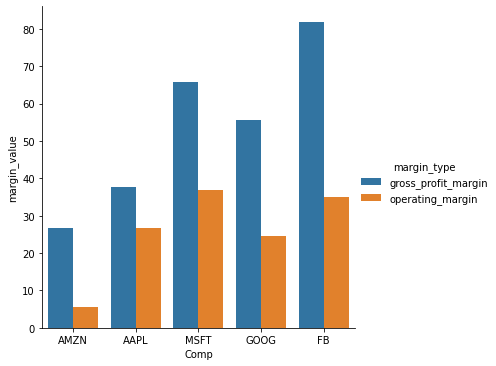

In [14]:
# don't run this cell

### Customizing a seaborn catplot

We are now going to customize the barplot by changing the plot title, axis and legend labels and the overall visual appearance by applying a theme.

- `sns.set_style('whitegrid')` sets the theme to whitegrid. There are five themes available: darkgrid, whitegrid, dark, white, and ticks
- `g.set()` can be used to set the title, axis labels, axis ticks and limits
- `g._legend.set_title()` sets the legend title
- `g._legend.texts[i].` to set a text value for the i-th label

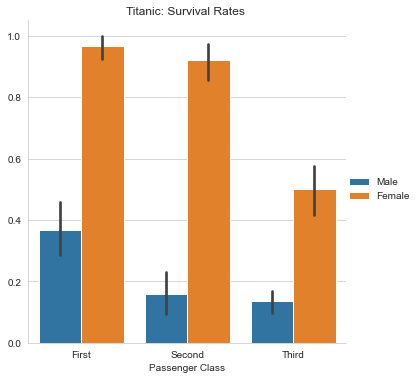

In [15]:
sns.set_style('whitegrid')

g = sns.catplot(x='class', y='survived', hue='sex', kind='bar', data=titanic)

g.set(title='Titanic: Survival Rates ', xlabel='Passenger Class', ylabel='')
g._legend.set_title('')
g._legend.texts[0].set_text('Male')
g._legend.texts[1].set_text('Female')

### Task 7: Customizing the margin plot

1. Set the title to 'Big Tech: Margins'
2. Remove the x axis label
3. Set the y axis label to Percent
4. Remove the legend title
5. Set the legend labels to 'Gross Profit Margin' and 'Operating Margin'

### Solution output

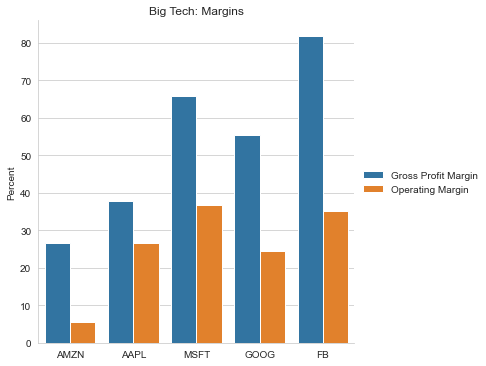

In [16]:
# don't run this cell


&nbsp;

&nbsp;

### Final task: Please give us your feedback!

This is the first time that we are delivering our trainings online. In order to adapt our training to your needs and provide the most valuable learning experience for you, we depend on your feedack.

We would be grateful if you could take **1 min** before the end of the workshop to get your feedback!

[Click here to open the survey!](https://lse.eu.qualtrics.com/jfe/form/SV_77M35cq1arxNcj3?course=D058-P4A3&topic=Python&cohort=LT21&link=https://lsecloud-my.sharepoint.com/:u:/g/personal/m_wiemers_lse_ac_uk/ERBz-t1wjxtLkk41j7SkpdMBWuZHzM-17gJdnWRoPXl0tA?e=ywMhHm)

&nbsp;

## Bonus tasks

Use the documetation on the seaborn website or search on google to get help with the following tasks.
1. Reorder the companies on the x-axis based on the gross profit margin in ascending order. You can set the order manually using an argument in the catplot() function.
2. Change the x-axis tick labels to the full company name. 
3. Set the colour palette to pastel.

### Solution output

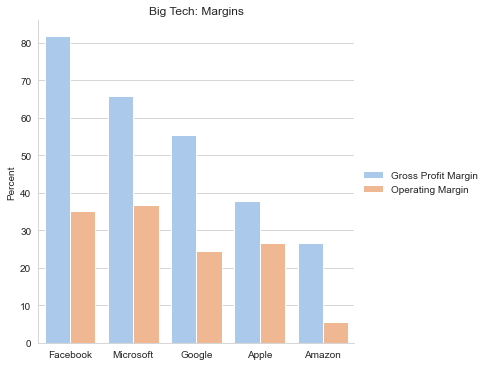

In [17]:
# don't run this cell